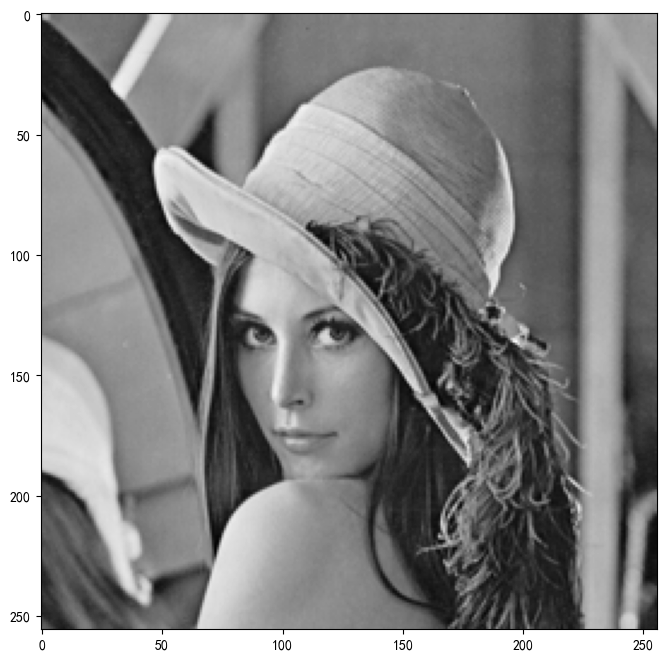

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# 读取bmp格式图片
img = mpimg.imread('./imagedata/lena.bmp')

# 显示图片
plt.imshow(img, cmap='gray')
plt.show()



In [53]:
img

array([[142, 172, 171, ..., 160, 162, 162],
       [146, 176, 173, ..., 160, 162, 162],
       [115, 151, 161, ..., 160, 160, 163],
       ...,
       [ 92,  93,  83, ...,  52,  51,  51],
       [ 99, 101,  93, ...,  50,  49,  46],
       [107, 103,  99, ...,  51,  56,  44]], dtype=uint8)

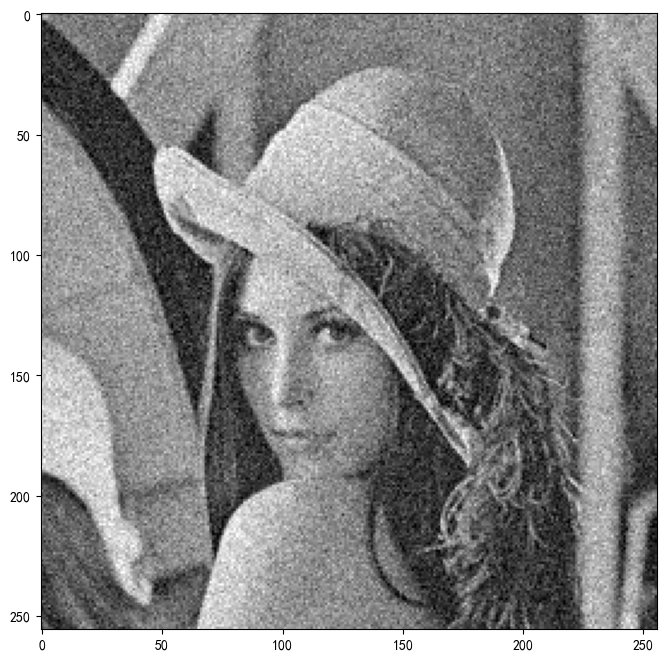

In [54]:
guass_noise = np.random.normal(0,20,img.shape)
img_guass_noise = np.clip(img + guass_noise,a_min=0,a_max=255).astype('uint8')
# 显示图片
plt.imshow(img_guass_noise, cmap='gray')
plt.show()

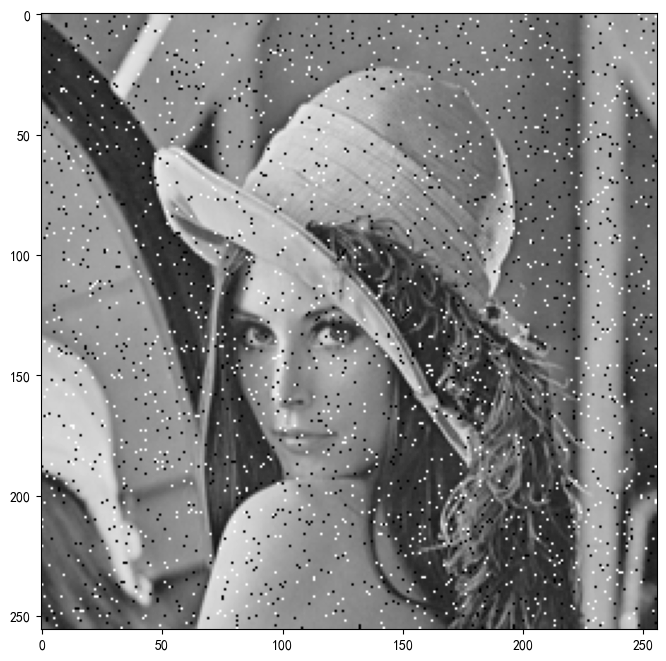

In [55]:
# 椒盐噪声
p_0 = p_255 = 0.02
noise_mask = np.random.choice([0, 1, 2], size=img.shape, p=[1-p_0-p_255, p_0, p_255])
img_salt_pepper_noise = img.copy()
img_salt_pepper_noise[noise_mask == 1] = 0
img_salt_pepper_noise[noise_mask == 2] = 255

# 显示图片
plt.imshow(img_salt_pepper_noise, cmap='gray')
plt.show()

## neighbor averaging

In [56]:
def cov2d(img, mask):
    """计算二维卷积运算"""
    h, w = mask.shape
    Y = np.zeros((img.shape[0] - h + 1, img.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (img[i:i + h, j:j + w] * mask).sum()
    return Y

In [57]:
def median_filter(img, kerner_size):
    Y = np.zeros((img.shape[0] - kerner_size + 1, img.shape[1] - kerner_size + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = np.median(img[i:i + kerner_size, j:j + kerner_size])
    return Y

In [58]:
np.median([3,2,1])

2.0

In [59]:
# 设置图像的默认大小为8英寸 x 6英寸
#plt.rcParams['figure.figsize']=(10,8)

Text(0.5, 1.0, 'median filter')

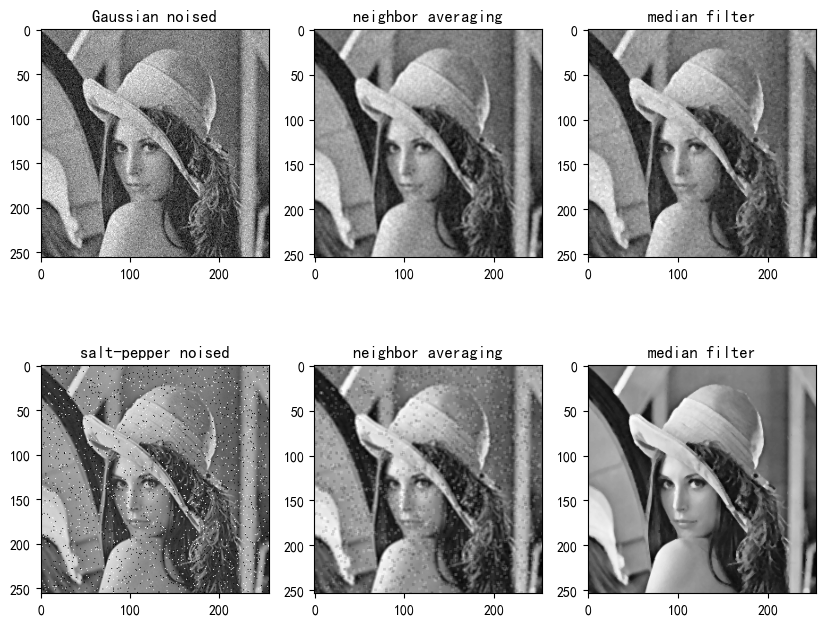

In [60]:
# 局域平均处理
mat = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])
mask = mat / mat.sum()
neighbor_avg_guass = cov2d(img_guass_noise, mask)
neighbor_avg_salt_pepper = cov2d(img_salt_pepper_noise, mask)

# 中值滤波处理
median_guass = median_filter(img_guass_noise, 3)
median_salt_pepper = median_filter(img_salt_pepper_noise, 3)

# 显示处理后的图片
plt.subplot(2,3,1)
plt.imshow(img_guass_noise, cmap='gray')
plt.title('Gaussian noised')

plt.subplot(2,3,2)
plt.imshow(neighbor_avg_guass, cmap='gray')
plt.title('neighbor averaging')

plt.subplot(2,3,3)
plt.imshow(median_guass, cmap='gray')
plt.title('median filter')

plt.subplot(2,3,4)
plt.imshow(img_salt_pepper_noise, cmap='gray')
plt.title('salt-pepper noised')

plt.subplot(2,3,5)
plt.imshow(neighbor_avg_salt_pepper, cmap='gray')
plt.title('neighbor averaging')

plt.subplot(2,3,6)
plt.imshow(median_salt_pepper, cmap='gray')
plt.title('median filter')